In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Define the positive and negative classes

#True value is +1
positive_points = np.array([(-2, 3), (0, 1), (2, -1)])
negative_points = np.array([(-2, 1), (0, -1), (2, -3)])

In [22]:
positive_points

array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

In [23]:
positive_points[:, 0]

array([-2,  0,  2])

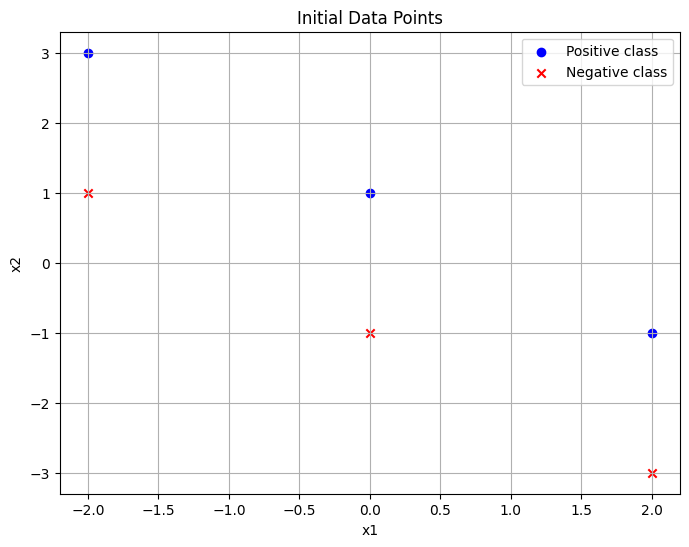

In [24]:
# Plot initial data points
plt.figure(figsize=(8, 6))
plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', marker='o', label='Positive class')
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', marker='x', label='Negative class')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial Data Points')
plt.grid(True)
plt.show()

In [25]:
# Combine all points and labels
X = np.vstack((positive_points, negative_points))
y = np.array([1]*len(positive_points) + [-1]*len(negative_points))

In [26]:
X


array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [27]:
y

array([ 1,  1,  1, -1, -1, -1])

In [28]:
# Perceptron Algorithm
def perceptron(X, y, steps=10):
    theta = np.zeros(X.shape[1])
    theta0 = 0
    for t in range(steps):
        for i,xi in enumerate(X):
            if y[i]*(np.dot(xi, theta) + theta0) <= 0:
                theta = theta + y[i]*xi
                theta0 = theta0 + y[i]
                break
        # Plot aftere each iteration
        plot_decision_boundary(theta, theta0, t+1)
    return theta, theta0    

In [29]:
def plot_decision_boundary(theta, theta0, iteration):
    plt.figure(figsize=(8, 6))
    plt.scatter(positive_points[:, 0], positive_points[:, 1], color='blue', label='Positive Class')
    plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative Class')

    # Plot Decision Boundary
    x_values = np.linspace(-3, 3, 2)
    # Check for theta[1] to avoid devision by zero in case of vertical line
    if theta[1] != 0:
        y_values = -(theta[0]*x_values + theta0)/theta[1]
        plt.plot(x_values, y_values, label =f'Iteration{iteration}')

    else:
        # Plot Vertical Line
        x_val = -theta0/theta[0]
        plt.axvline(x=x_val, label=f'Iteration{iteration}')

    plt.xlim(-3, 3)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f'Decision Boundary at Iteration {iteration}')
    plt.legend()
    plt.grid(True)
    plt.show()


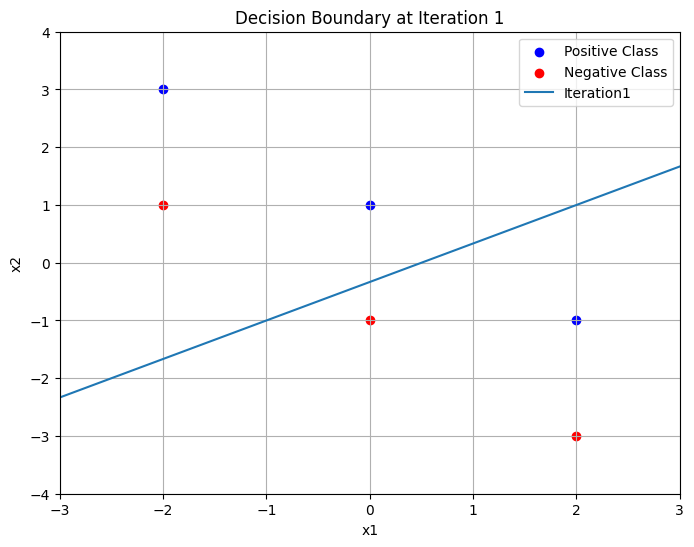

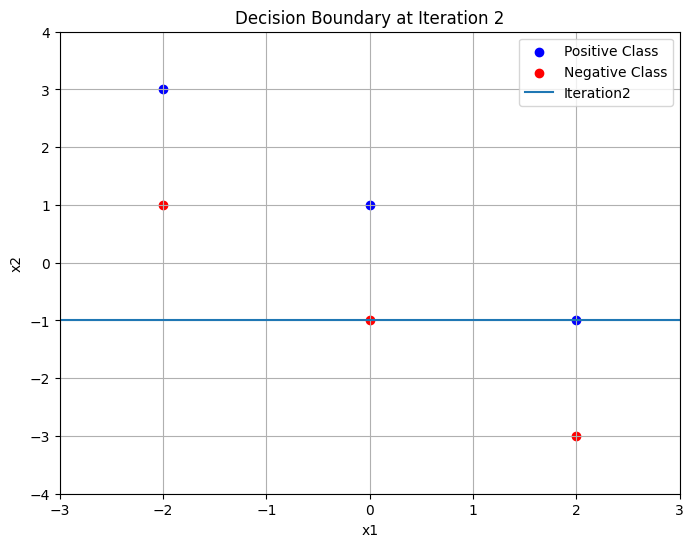

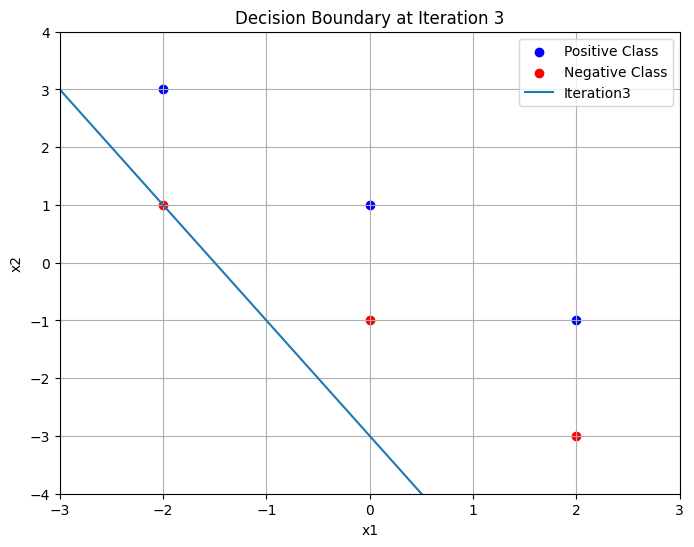

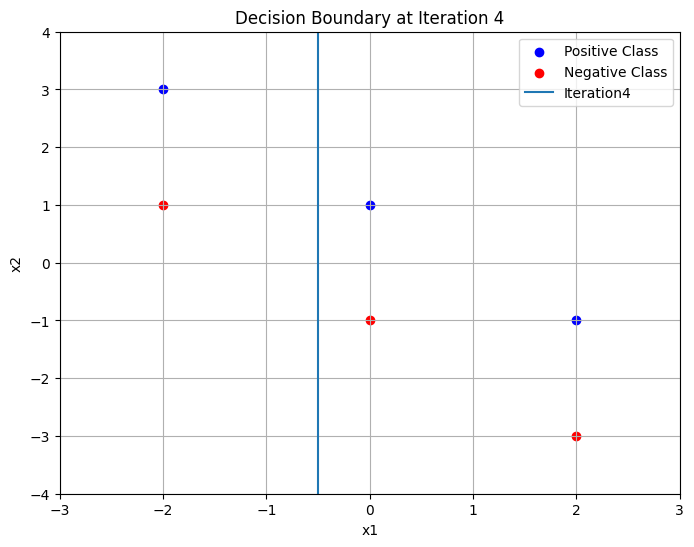

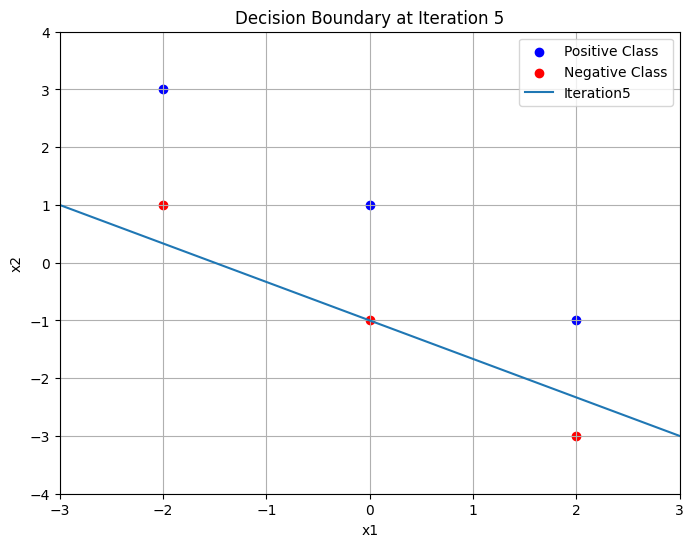

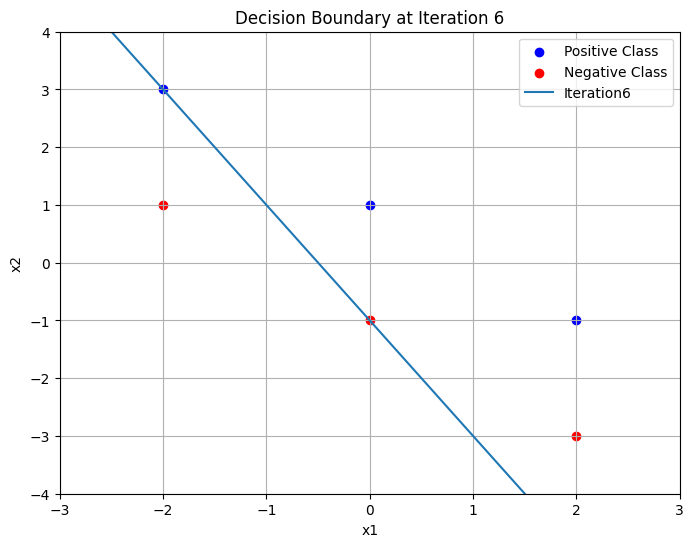

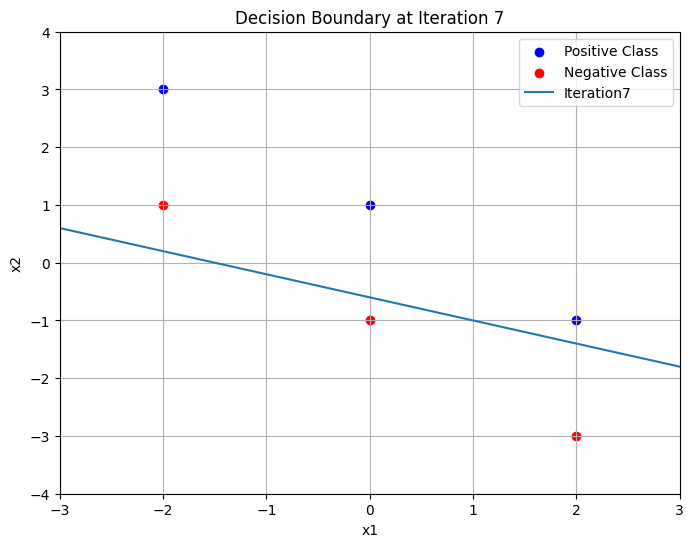

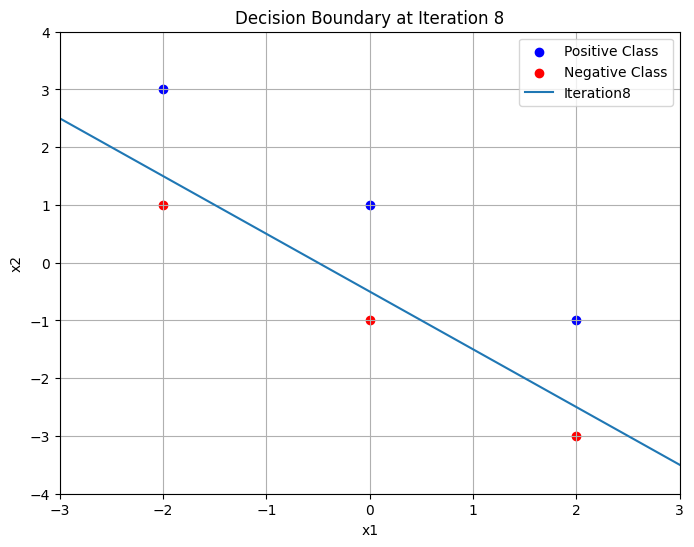

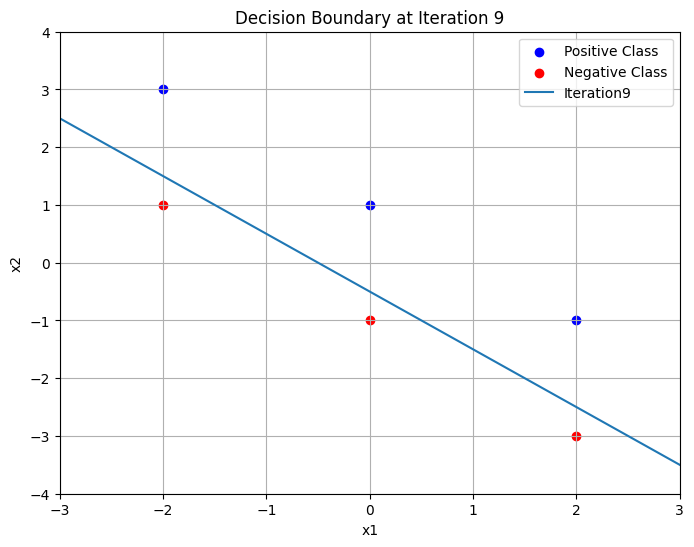

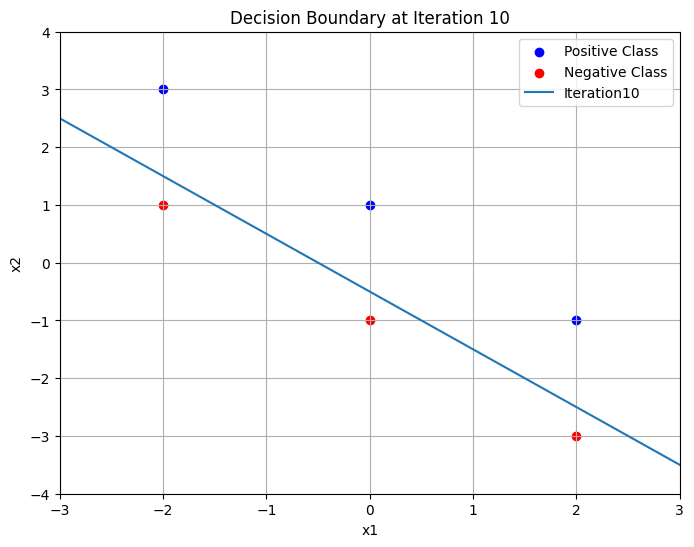

In [30]:
theta_final, theta0_final = perceptron(X, y, 10)